## HW6.0. 
* In mathematics, computer science, economics, or management science what is mathematical optimization? Give an example of a optimization problem that you have worked with directly or that your organization has worked on. Please describe the objective function and the decision variables. Was the project successful (deployed in the real world)? Describe.

    Optimization essentially means creating some sort of objective function, and then finding the roots of this function, so as to find the inputs that result in the min/max value of this objective function.  An example of this in my line of work would be finding the optimal amount of money better than value price at which my team would purchase an option.  For example, an optin we think is worth \$1.00 might sell for \$.98, but this option may lose value in the future, so there tends to be a sweet spot for much edge we require.




## HW6.1  Optimization theory: 
* For unconstrained univariate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. Also in python, plot the univartiate function 
$$X^3 -12x^2-6$$ defined over $[-6, 6]$

* Also plot its corresponding first and second derivative functions. Eyeballing these graphs, identify candidate optimal points and then classify them as local minimums or maximums. Highlight and label these points in your graphs. Justify your responses using the FOC and SOC.

* For unconstrained multi-variate optimization what are the first order  Necessary Conditions for Optimality (FOC).  What are the second order optimality conditions (SOC)? Give a mathematical defintion. What is the Hessian matrix in this context?


The optimal  points on this grpah appear to be around x={0,8}.  This is consistent with f'(0) and f'(8) being equal to 0, and we also see that f'' is equal to -24 for x=0, and 24 for x=8, meaning that f is a maximum at x=0 and a minimum at x=8.  


#### Unconstrainted Univariate Optimization: 

First order conditions:

* f'(x) = 0

Second order conditions:

* f''(x) < 0 => maximum
* f''(x) > 0 => minimum
* f''(x) = 0 => undefined


#### Unconstrainted Multivariate Optimization: 

The Hessian matrix of a function is the NxN matrix of it's second-order partial derivatives for every i,j such that i,j belong to {0,N}.

A multivariate function has an extrema under the following conditions:

* If the Hessian is positive definite (equivalently, has all eigenvalues positive) at (a, b, ...), then f attains a local minimum at (a, b, ...).
* If the Hessian is negative definite (equivalently, has all eigenvalues negative) at (a, b, ...), then f attains a local maximum at (a, b, ...).
* If the Hessian has both positive and negative eigenvalues then (a, b, ...) is a saddle point for f (and in fact this is true even if (a, b, ...) is degenerate).

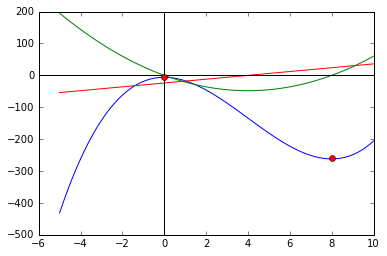

In [21]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5,10,100) # 100 linearly spaced numbers
y = x**3 -12*x**2-6 # computing the values of sin(x)/x
y_p = 3*x**2-24*x
y_pp = 6*x-24

# compose plot

fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, y_p)
ax.plot(x,y_pp)
#ax.set_aspect('equal')
#ax.grid(True, which='both')

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

data_x = [0, 8]
data_y = [-6, -260]
ax.plot(data_x, data_y, 'or')


## HW6.2
* Taking x=1 as the first approximation(xt1) of a root of $X^3 + 2x -4 = 0$, use the Newton-Raphson method to calculate the second approximation (denoted as xt2) of this root. (Hint the solution is xt2=1.2)




f'(x) = 3x^2 + 2
x1 = x0 - f(x0)/f'(x0)

x0 = 1

x2 = 1 - (-1)/5 = 1.2
x3 = 1.2 - f(1.2)/f'(1.2) = 1.2 - (.128)/6.32 = 1.18



## HW6.3 Convex optimization 
* What makes an optimization problem convex? What are the first order  Necessary Conditions for Optimality in convex optimization.  What are the second order optimality conditions for convex optimization? Are both necessary to determine the maximum or minimum of candidate optimal solutions?

Fill in the BLANKS here:
Convex minimization, a subfield of optimization, studies the problem of minimizing **BLANK** functions over **BLANK** sets. The **BLANK** property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.


An optimization problem is convex if the objective function is a convex function and if the inputs x belong to a convex set.  The first and second order optimality conditions are the same as non-convex optimization, but the key difference is that for convex optimization a local minimum/maximum is automatically a global min/max, which is what makes algorithms like gradient descent work.

Convex minimization, a subfield of optimization, studies the problem of minimizing convex functions over convex sets. The convexity property can make optimization in some sense "easier" than the general case - for example, any local minimum must be a global minimum.


## HW 6.4

The learning objective function for weighted ordinary least squares (WOLS) (aka weight linear regression) is defined as follows:

$$0.5* \sum_{i=1}^n (weight_i * (W * X_i - y_i)^2)$$

Where training set consists of input variables X ( in vector form) and a target variable y, and W is the vector of coefficients for the linear regression model.

Derive the gradient for this weighted OLS by hand; showing each step and also explaining each step.


$$d_{weight} = 0.5* \sum_{i=1}^n (W * X_i - y_i)^2$$

$$d_{weight} = 0.5* \sum_{i=1}^n (W * X_i - y_i)^2$$

$$d_x =  \sum_{i=1}^n (weight_i * (W * X_i - y_i) * W)$$


## HW 6.5
Write a MapReduce job in MRJob to do the training at scale of a weighted OLS model using gradient descent. <br>
Generate one million datapoints just like in the following notebook:  http://nbviewer.ipython.org/urls/dl.dropbox.com/s/kritdm3mo1daolj/MrJobLinearRegressionGD.ipynb

Weight each example as follows: 

$$weight(x)= abs(1/x)$$

Sample 1% of the data in MapReduce and use the sampled dataset to train a (weighted if available in SciKit-Learn) linear regression model locally using  SciKit-Learn (http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Plot the resulting weighted linear regression model versus the original model that you used to generate the data. Comment on your findings.

## HW6.5.1 (OPTIONAL)
Using MRJob and in Python, plot the error surface for the weighted linear regression model using a heatmap and contour plot. 
Also plot the current model in the original domain space.  (Plot them side by side if possible)
Plot the path to convergence (during training) for the weighted linear regression model in plot error space and in the original domain space. Make sure to label your plots with iteration numbers, function, model space versus original domain space, etc.
Comment on convergence and on the mean squared error using your weighted OLS algorithm on the weighted dataset versus using the weighted OLS algorithm on the uniformly weighted dataset.



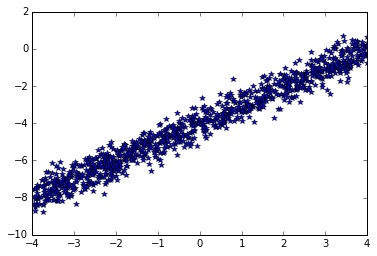

In [2]:
 %matplotlib inline
import numpy as np
import pylab 
size = 1000
x = np.random.uniform(-4, 4, size)
y = x * 1.0 - 4 + np.random.normal(0,0.5,size)
data = zip(y,x)
np.savetxt('LinearRegression.csv',data,delimiter = ",")

pylab.plot(x, y,'*')
pylab.show()

In [15]:
%%writefile MrJobBatchGDUpdate_LinearRegression.py
from mrjob.job import MRJob

# This MrJob calculates the gradient of the entire training set 
#     Mapper: calculate partial gradient for each example  
#     
class MrJobBatchGDUpdate_LinearRegression(MRJob):
    # run before the mapper processes any input
    def read_weightsfile(self):
        # Read weights file
        with open('/Users/AnthonySpalvieriKruse/VirtualBoxShared/HW6/weights.txt', 'r') as f:
            self.weights = [float(v) for v in f.readline().split(',')]
        # Initialze gradient for this iteration
        self.partial_Gradient = [0]*len(self.weights)
        self.partial_count = 0
    
    # Calculate partial gradient for each example 
    def partial_gradient(self, _, line):
        D = (map(float,line.split(',')))
        # y_hat is the predicted value given current weights
        y_hat = self.weights[0]+self.weights[1]*D[1]
        # Update parial gradient vector with gradient form current example
        self.partial_Gradient =  [self.partial_Gradient[0]+ D[0]-y_hat, self.partial_Gradient[1]+(D[0]-y_hat)*D[1]]
        self.partial_count = self.partial_count + 1
        #yield None, (D[0]-y_hat,(D[0]-y_hat)*D[1],1)
    
    # Finally emit in-memory partial gradient and partial count
    def partial_gradient_emit(self):
        yield None, (self.partial_Gradient,self.partial_count)
        
    # Accumulate partial gradient from mapper and emit total gradient 
    # Output: key = None, Value = gradient vector
    def gradient_accumulater(self, _, partial_Gradient_Record): 
        total_gradient = [0]*2
        total_count = 0
        for partial_Gradient,partial_count in partial_Gradient_Record:
            total_count = total_count + partial_count
            total_gradient[0] = total_gradient[0] + partial_Gradient[0]
            total_gradient[1] = total_gradient[1] + partial_Gradient[1]
        yield None, [v/total_count for v in total_gradient]
    
    def steps(self):
        return [self.mr(mapper_init=self.read_weightsfile,
                       mapper=self.partial_gradient,
                       mapper_final=self.partial_gradient_emit,
                       reducer=self.gradient_accumulater)] 
    
if __name__ == '__main__':
    MrJobBatchGDUpdate_LinearRegression.run()

Overwriting MrJobBatchGDUpdate_LinearRegression.py


In [17]:
from numpy import random,array
from MrJobBatchGDUpdate_LinearRegression import MrJobBatchGDUpdate_LinearRegression

learning_rate = 0.05
stop_criteria = 0.000005

# Generate random values as inital weights
weights = array([random.uniform(-3,3),random.uniform(-3,3)])
# Write the weights to the files
with open('weights.txt', 'w+') as f:
    f.writelines(','.join(str(j) for j in weights))

# create a mrjob instance for batch gradient descent update over all data
mr_job = MrJobBatchGDUpdate_LinearRegression(args=['LinearRegression.csv', "--file", "/Users/AnthonySpalvieriKruse/VirtualBoxShared/HW6/weights.txt"])
# Update centroids iteratively
i = 0
while(1):
    print "iteration ="+str(i)+"  weights =",weights
    # Save weights from previous iteration
    weights_old = weights
    with mr_job.make_runner() as runner: 
        runner.run()
        # stream_output: get access of the output 
        for line in runner.stream_output():
            # value is the gradient value
            key,value =  mr_job.parse_output_line(line)
            # Update weights
            weights = weights + learning_rate*array(value)
    i = i + 1
    ## Write the updated weights to file 
    with open('weights.txt', 'w+') as f:
        f.writelines(','.join(str(j) for j in weights))
    #Stop if weights get converged
    if(sum((weights_old-weights)**2)<stop_criteria):
        break
        
print "Final weights\n"
print weights

iteration =0  weights = [-0.34818881 -0.01320189]
iteration =1  weights = [-0.53610473  0.27933931]
iteration =2  weights = [-0.71338923  0.49059638]
iteration =3  weights = [-0.88091722  0.6429789 ]
iteration =4  weights = [-1.03942517  0.75272696]
iteration =5  weights = [-1.18954418  0.83160919]
iteration =6  weights = [-1.33182406  0.88815353]
iteration =7  weights = [-1.46675112  0.92853918]
iteration =8  weights = [-1.59476124  0.95724313]
iteration =9  weights = [-1.71624962  0.97750873]
iteration =10  weights = [-1.83157799  0.99168528]
iteration =11  weights = [-1.94108005  1.00147413]
iteration =12  weights = [-2.04506567  1.00810715]
iteration =13  weights = [-2.14382399  1.01247594]
iteration =14  weights = [-2.23762595  1.01522556]
iteration =15  weights = [-2.32672619  1.01682244]
iteration =16  weights = [-2.41136467  1.01760362]
iteration =17  weights = [-2.49176793  1.01781237]
iteration =18  weights = [-2.56815015  1.01762408]
iteration =19  weights = [-2.64071405  1.


## HW6.6 Clean up notebook for GMM via EM

Using the following notebook as a starting point:

http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/0t7985e40fovlkw/EM-GMM-MapReduce%20Design%201.ipynb 

Improve this notebook as follows:
-- Add in equations into the notebook (not images of equations) 
-- Number the equations
-- Make sure the equation notation matches the code and the code and comments refer to the equations numbers
-- Comment the code
-- Rename/Reorganize the code to make it more readable
-- Rerun the examples similar graphics (or possibly better graphics)


## HW6.7  Implement Bernoulli Mixture Model via EM
Implement the EM clustering algorithm to determine Bernoulli Mixture Model for discrete data in MRJob.

As a unit test use the dataset in the following slides:

https://www.dropbox.com/s/maoj9jidxj1xf5l/MIDS-Live-Lecture-06-EM-Bernouilli-MM-Systems-Test.pdf?dl=0

Cross-check that you get the same cluster assignments and cluster Bernouilli models as presented in the slides after 25 iterations. Dont forget the smoothing.

As a full test: use the same dataset from HW 4.5, the Tweet Dataset. 
Using this data, you will implement a 1000-dimensional EM-based Bernoulli Mixture Model  algorithm in MrJob on the users
by their 1000-dimensional word stripes/vectors using K = 4.  Use the same smoothing as in the unit test.

Repeat this experiment using your KMeans MRJob implementation fron HW4.
Report the rand index score using the class code as ground truth label for both algorithms and comment on your findings.

Here is some more information on the Tweet Dataset.

Here you will use a different dataset consisting of word-frequency distributions 
for 1,000 Twitter users. These Twitter users use language in very different ways,
and were classified by hand according to the criteria:

0: Human, where only basic human-human communication is observed.

1: Cyborg, where language is primarily borrowed from other sources
(e.g., jobs listings, classifieds postings, advertisements, etc...).

2: Robot, where language is formulaically derived from unrelated sources
(e.g., weather/seismology, police/fire event logs, etc...).

3: Spammer, where language is replicated to high multiplicity
(e.g., celebrity obsessions, personal promotion, etc... )

Check out the preprints of  recent research,
which spawned this dataset:

http://arxiv.org/abs/1505.04342
http://arxiv.org/abs/1508.01843

The main data lie in the accompanying file:

topUsers_Apr-Jul_2014_1000-words.txt

and are of the form:

USERID,CODE,TOTAL,WORD1_COUNT,WORD2_COUNT,...
.
.

where

USERID = unique user identifier
CODE = 0/1/2/3 class code
TOTAL = sum of the word counts

Using this data, you will implement a 1000-dimensional K-means algorithm in MrJob on the users
by their 1000-dimensional word stripes/vectors using several 
centroid initializations and values of K.


